In [1]:
from czibench.runner import ContainerRunner
from czibench.tasks.sc import ClusteringTask, EmbeddingTask, MetadataLabelPredictionTask
from czibench.datasets.utils import load_dataset

In [2]:
# dataset = load_dataset("tsv2_bladder")
dataset = load_dataset("example", config_path="custom.yaml")

In [3]:
runner = ContainerRunner(
    image="czibench-geneformer:latest",
    gpu=True,
)

dataset = runner.run(dataset)

2025-01-30 22:54:56,863 - czibench.models.base - INFO - Loading data...
2025-01-30 22:54:57,263 - czibench.models.base - INFO - Data loaded successfully
2025-01-30 22:54:57,263 - czibench.models.base - INFO - Validating data...
2025-01-30 22:54:57,272 - czibench.models.base - INFO - Data validated successfully
2025-01-30 22:54:57,283 - czibench.models.base - INFO - Model weights already downloaded...
2025-01-30 22:54:57,283 - czibench.models.base - INFO - Running model...
Tokenizing temp_dataset.h5ad
/usr/local/lib/python3.10/dist-packages/geneformer/tokenizer.py:495: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
for i in adata.var["ensembl_id_collapsed"][coding_miRNA_loc]
/usr/local/lib/python3.10/dist-packages/geneformer/tokenizer.py:498: FutureWarning: Series.__getitem__ treating keys as positions is

RuntimeError: Container exited with status code 1

In [5]:
task = ClusteringTask(label_key="cell_type")
dataset, clustering_results = task.run(dataset)

task = EmbeddingTask(label_key="cell_type")
dataset, embedding_results = task.run(dataset)

task = MetadataLabelPredictionTask(label_key="cell_type")
dataset, prediction_results = task.run(dataset)

/home/ssm-user/miniconda3/envs/benchmarks/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ssm-user/miniconda3/envs/benchmarks/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

In [6]:
prediction_results

{'mean_accuracy': np.float64(0.8212953359026649),
 'lr_mean_accuracy': np.float64(0.8546035975010481),
 'knn_mean_accuracy': np.float64(0.7879870743042817),
 'mean_f1': np.float64(0.818183207027794),
 'lr_mean_f1': np.float64(0.852283511283192),
 'knn_mean_f1': np.float64(0.7840829027723959),
 'mean_precision': np.float64(0.8181812009169033),
 'lr_mean_precision': np.float64(0.8508001776545229),
 'knn_mean_precision': np.float64(0.7855622241792837),
 'mean_recall': np.float64(0.8212953359026649),
 'lr_mean_recall': np.float64(0.8546035975010481),
 'knn_mean_recall': np.float64(0.7879870743042817)}

In [6]:
embedding_results

{'silhouette_score': np.float32(0.026767414)}

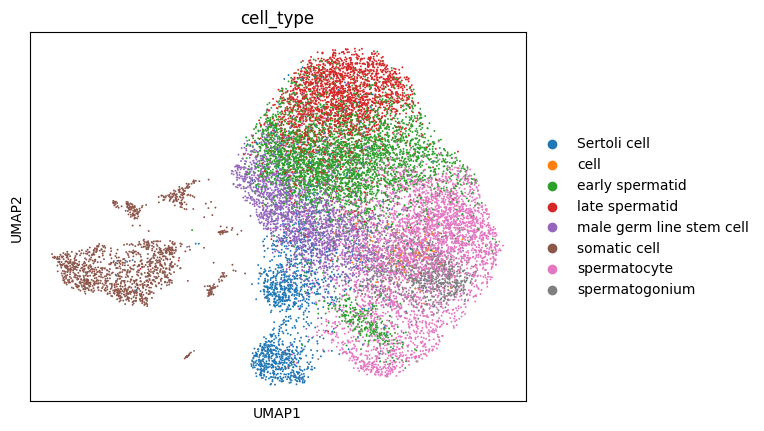

In [7]:
import scanpy as sc
sc.tl.umap(dataset.adata)
sc.pl.umap(dataset.adata, color="cell_type")